In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier, XGBRegressor
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor, CatBoostClassifier

In [3]:
df = pd.read_csv('datasets/gym_members_exercise_tracking.csv')

In [5]:
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


In [4]:
df['Workout_Type'].unique()

array(['Yoga', 'HIIT', 'Cardio', 'Strength'], dtype=object)

In [5]:
#1 nacin 

encoder = LabelEncoder()

df['Gender'] = encoder.fit_transform(df['Gender'])
df['Workout_Type'] = encoder.fit_transform(df['Workout_Type'])

In [29]:
# 2 nacin 
# df_encoded = pd.get_dummies(df, columns=['Gender', 'Workout_Type'])

# X = df_encoded.drop(columns='Target_Column')  # Replace 'Target_Column' with the actual target column name
# y = df_encoded['Target_Column']  

In [33]:
df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

<Axes: >

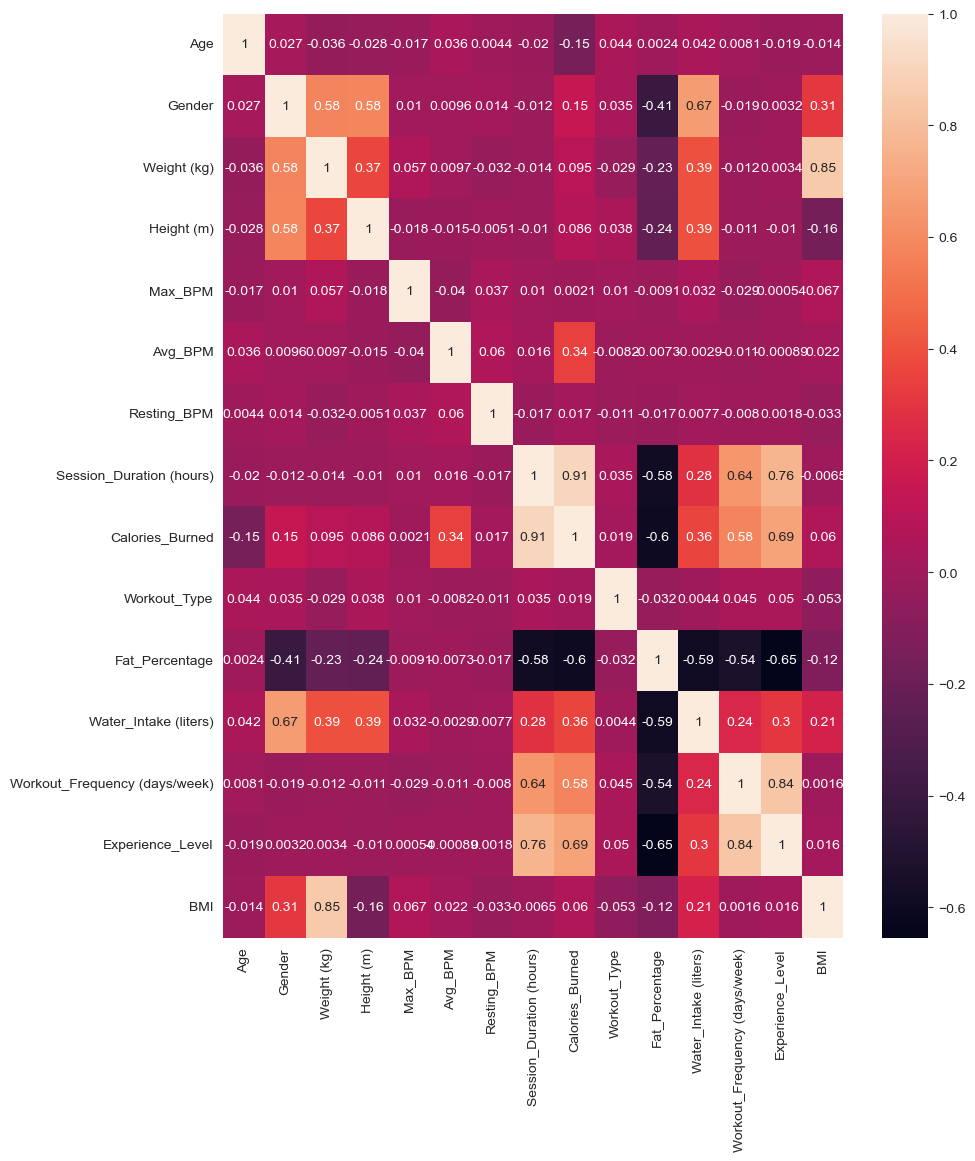

In [6]:
plt.figure(figsize=(10,12))
sns.heatmap(df.corr(), annot=True)

<Axes: >

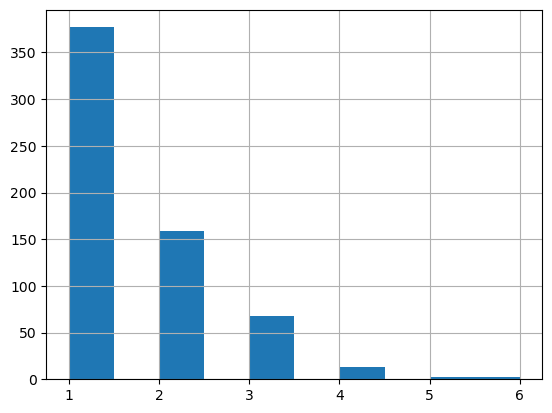

In [145]:
df['Calories_Burned'].value_counts().hist()
# not balanced 

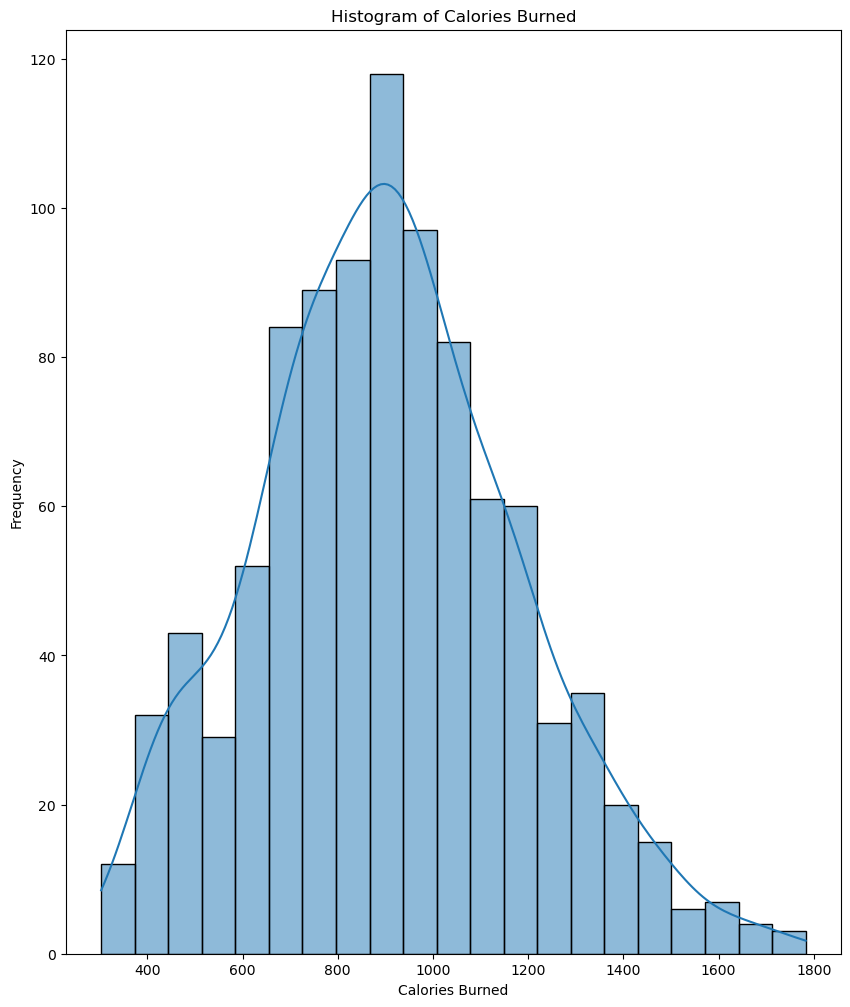

In [147]:
plt.figure(figsize=(10,12))
sns.histplot(df['Calories_Burned'], kde=True)
plt.title("Histogram of Calories Burned")
plt.xlabel("Calories Burned")
plt.ylabel("Frequency")
plt.show()

In [53]:
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,1,88.3,1.71,180,157,60,1.69,1313.0,3,12.6,3.5,4,3,30.20
1,46,0,74.9,1.53,179,151,66,1.30,883.0,1,33.9,2.1,4,2,32.00
2,32,0,68.1,1.66,167,122,54,1.11,677.0,0,33.4,2.3,4,2,24.71
3,25,1,53.2,1.70,190,164,56,0.59,532.0,2,28.8,2.1,3,1,18.41
4,38,1,46.1,1.79,188,158,68,0.64,556.0,2,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,1,87.1,1.74,187,158,67,1.57,1364.0,2,10.0,3.5,4,3,28.77
969,25,1,66.6,1.61,184,166,56,1.38,1260.0,2,25.0,3.0,2,1,25.69
970,59,0,60.4,1.76,194,120,53,1.72,929.0,0,18.8,2.7,5,3,19.50
971,32,1,126.4,1.83,198,146,62,1.10,883.0,1,28.2,2.1,3,2,37.74


In [75]:
df.isin(['', 'N/A', 'NA', '/']).sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [7]:
x = df.drop(columns='Calories_Burned')
y = df['Calories_Burned']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [9]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# PIPELINE OF MODELS 

In [10]:
models = {
    'XGBRegressor' : XGBRegressor(n_estimators = 10, max_depth = 5, learning_rate = 0.2, ),
    'LinearRegression' : LinearRegression(),
    'RandomForestRegressor' : RandomForestRegressor(n_estimators=150, max_depth=5, random_state=42),
    'CatBoostRegressor' : CatBoostRegressor(learning_rate=0.05, iterations = 500, depth =10, eval_metric='RMSE', bagging_temperature = 0.2),
    'DecisionTreeRegressor' : DecisionTreeRegressor(criterion = 'squared_error', max_depth = 5 )
}

for name, model in models.items():

    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    print(f"\n{name} Evaluation:")
    print(r2_score(y_test, y_pred))
    print(mean_squared_error(y_test, y_pred))
    print(mean_absolute_error(y_test, y_pred))



XGBRegressor Evaluation:
0.9560642917915404
3342.037978912484
42.719199625651044

LinearRegression Evaluation:
0.9794913038896134
1560.0258671986041
28.96642669158729

RandomForestRegressor Evaluation:
0.9382996841338582
4693.3304900235735
52.97351670602978
0:	learn: 263.5509581	total: 61.9ms	remaining: 30.9s
1:	learn: 255.1934701	total: 65.7ms	remaining: 16.4s
2:	learn: 247.8649407	total: 68.6ms	remaining: 11.4s
3:	learn: 241.1524693	total: 71.9ms	remaining: 8.92s
4:	learn: 232.2366479	total: 75.3ms	remaining: 7.46s
5:	learn: 225.0587844	total: 78.5ms	remaining: 6.46s
6:	learn: 216.7882931	total: 81.4ms	remaining: 5.73s
7:	learn: 210.6294773	total: 84.4ms	remaining: 5.19s
8:	learn: 204.1989481	total: 87.3ms	remaining: 4.76s
9:	learn: 199.0580658	total: 90.1ms	remaining: 4.42s
10:	learn: 193.4209346	total: 92.9ms	remaining: 4.13s
11:	learn: 187.1477056	total: 95.9ms	remaining: 3.9s
12:	learn: 181.2406551	total: 98.5ms	remaining: 3.69s
13:	learn: 176.5065716	total: 101ms	remaining: 3.5

## BONUS TASK  - GridSearchCV

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [12]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Fine-Tuning the Hyperparameters

In [13]:
#za CatBoostRegressor hiperparametri

param_grid = {
    'iterations' : [100, 200, 500],
    'learning_rate' : [0.01, 0.05, 0.1],
    'depth' : [6, 8, 10]
}

grid_search = GridSearchCV(estimator = CatBoostRegressor(), param_grid=param_grid, cv=5, scoring = 'r2')

grid_search.fit(x_train, y_train)

0:	learn: 270.2157296	total: 1.74ms	remaining: 172ms
1:	learn: 268.3261915	total: 2.75ms	remaining: 135ms
2:	learn: 266.3113304	total: 3.72ms	remaining: 120ms
3:	learn: 264.3748602	total: 4.99ms	remaining: 120ms
4:	learn: 262.6855580	total: 6.05ms	remaining: 115ms
5:	learn: 260.7878440	total: 7ms	remaining: 110ms
6:	learn: 259.0339008	total: 8.08ms	remaining: 107ms
7:	learn: 257.4221774	total: 8.77ms	remaining: 101ms
8:	learn: 255.8104498	total: 9.37ms	remaining: 94.7ms
9:	learn: 254.0508743	total: 9.93ms	remaining: 89.4ms
10:	learn: 252.0654303	total: 10.5ms	remaining: 84.8ms
11:	learn: 250.2796027	total: 10.9ms	remaining: 79.8ms
12:	learn: 248.4541640	total: 11.4ms	remaining: 76.5ms
13:	learn: 246.7181576	total: 12.1ms	remaining: 74.1ms
14:	learn: 245.4265314	total: 12.3ms	remaining: 69.7ms
15:	learn: 243.6903251	total: 12.9ms	remaining: 67.6ms
16:	learn: 241.9046152	total: 13.3ms	remaining: 65.1ms
17:	learn: 240.2705617	total: 13.9ms	remaining: 63.4ms
18:	learn: 238.6757060	total: 1

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x168448df0>,
             param_grid={'depth': [6, 8, 10], 'iterations': [100, 200, 500],
                         'learning_rate': [0.01, 0.05, 0.1]},
             scoring='r2')

In [14]:
best_params = grid_search.best_params_
print("Best Hyperparameters found: ", best_params)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

Best Hyperparameters found:  {'depth': 6, 'iterations': 500, 'learning_rate': 0.05}


In [15]:
print(grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

0.9966909126535419
{'depth': 6, 'iterations': 500, 'learning_rate': 0.05}


In [16]:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.9955282185333766
257.02112336043484
9.586522459373706
